## ML - Advertisement click prediction using ANN 


Here, you will be working with a dummy advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. you will try to create a model that will predict whether or not they will click on an ad based on the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes

* 'Age': customer age in years

* 'Area Income': Avg. Income of geographical area of consumer

* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet

* 'Ad Topic Line': Headline of the advertisement

* 'City': City of consumer

* 'Male': Whether or not consumer was male

* 'Country': Country of consumer

* 'Timestamp': Time at which consumer clicked on Ad or closed window

* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

#### For the given dataset (Advertising dataset), implement the ANN classifier using Keras in Python.

**Dataset**: advertising.csv [https://www.kaggle.com/fayomi/advertising]


##### Tasks are as follows:
-------------------------------------------------------------
1. Import the libraries and Load the dataset and Remove/replace missing values (if any)

2. Split features and labels

3. Split train and test data

4. Implement ANN Classifier using Keras

5. Calculate accuracy measures

6. Justify model.

##### Importing all the necessary libraries

In [1]:
# load basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# might be needed depending on your version of Jupyter
%matplotlib inline

#### Loading the given dataset

In [2]:
df = pd.read_csv('advertising-1.csv')

#### Column info of the given dataset

In [ ]:
df.info()

## Exploratory Data Analysis

#### Checking to see that the target classes are balanced or not

In [ ]:
sns.countplot(x='Clicked on Ad', data=df)

##### Clearly we can see that the target classes 0 and 1 are properly balanced

#### Creating histogram of Daily Time Spent on Site 

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(df['Daily Time Spent on Site'], kde=False, bins=10)
plt.xlim(30,100)

#### Creating histogram of Daily Internet Usage

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(df['Daily Internet Usage'], kde=False, bins=10)
plt.xlim(100,300)

#### Exploring correlation between the continuous feature variables. 
Calculate the correlation between all continuous numeric variables using .corr() method.

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

##### From the heatmap of the correlation analysis it is clear that Age is the only column which has a positive correlation. All other features are negatively correlated with the Target class Clicked On Ad

## Data Preprocessing

Checking to see if there are any null values

In [ ]:
# Checking for missing values
df.isnull().sum()

#### Categorical Variables and Dummy Variables
**List all the columns that are currently non-numeric.

In [ ]:
df.select_dtypes(['object']).columns

In [ ]:
df['Timestamp']

##### Timestamp
This appears to be a historical time stamp feature. Extract the month from this feature using a .apply function, 
then convert it to a numeric feature. Set this new data to a feature column called 'Month'.Then drop the Timestamp feature.

In [12]:
df['Month'] = df['Timestamp'].apply(lambda date:int(date[5:7]))
df = df.drop('Timestamp',axis=1)

In [ ]:
# Checking unique values in Ad Topic Line column
df['Ad Topic Line'].nunique()

#### There are 1000 unique Ad Topic lines, so no point to try to convert this to a dummy variable feature. 
#### Removing the Ad Topic lines column.

In [14]:
df_new = df.drop('Ad Topic Line',axis=1)

In [ ]:
# Checking unique values in Ad Topic Line column
df_new['City'].nunique()

#### There are around 1000 unique City values, so no point to try to convert this to a dummy variable feature. 
#### Removing the City column.

In [16]:
df_new = df_new.drop('City',axis=1)

In [ ]:
# Checking unique values in Ad Topic Line column
df_new['Country'].nunique()

In [ ]:
df_new['Country'].value_counts()

Since there are only 1000 observations and Country has 237 unique values so we can drop this feature

In [19]:
df_new = df_new.drop('Country',axis=1)

#### Checking to see if the correlation has changed due to the dropping of these columns

In [ ]:
df_new.corr()

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df_new.corr(),annot=True,cmap='viridis')

No change in the correlation of the features. Age is still predominantly correlated with Clicked On Ad

### Train Test Split

**Import train_test_split from sklearn.**

In [22]:
from sklearn.model_selection import train_test_split

In [ ]:
df_new.info()

In [24]:
X = df_new.drop('Clicked on Ad',axis=1).values
y = df_new['Clicked on Ad'].values

In [25]:
X.shape, y.shape

((1000, 6), (1000,))

#### **Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

### Normalizing the Data
Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.

In [27]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Creating the Model

**Run the cell below to import the necessary Keras functions.**

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.models import load_model

##### **Build a sequential model to will be trained on the data.**

In [ ]:
model = Sequential()

# determine the number of input features
n_features = X_train.shape[1]
print(n_features)

# input layer
model.add(Dense(12,  input_shape=(n_features,), activation='relu'))
# model.add(Dense(6,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

##### **Fit the model to the training data for some epochs.**

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          batch_size=128,
          verbose=1,
          validation_data=(X_test, y_test), 
          )

##### **Save your model.**

In [31]:
model.save('adversting.h5')

### Evaluating Model Performance.

**Plot out the validation loss versus the training loss.**

<AxesSubplot:>

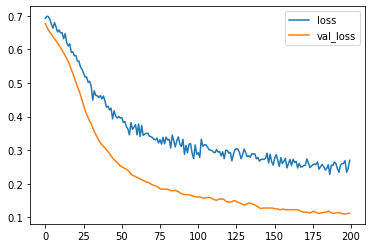

In [32]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

##### **Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

predictions = model.predict_classes(X_test)

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
confusion_matrix(y_test, predictions)

### **Given the customer below, would you offer this person a loan?**

In [ ]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))
print(random_ind)
new_customer = df_new.drop('Clicked on Ad',axis=1).iloc[random_ind]
new_customer

In [60]:
new_customer = scaler.transform(new_customer.values.reshape(1,6))

#### EXPECTED RESULT

In [61]:
df_new.iloc[random_ind]['Clicked on Ad']

1.0

#### PREDICTED RESULT

In [62]:
model.predict_classes(new_customer).tolist()[0]

c:\users\q1025311\.conda\envs\bits\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[1]

In [ ]:
random.seed(10)
random_ind = random.randint(0,len(df))
print(random_ind)
new_customer = df_new.drop('Clicked on Ad',axis=1).iloc[random_ind]
new_customer

In [64]:
new_customer = scaler.transform(new_customer.values.reshape(1,6))

#### EXPECTED RESULT

In [65]:
df_new.iloc[random_ind]['Clicked on Ad'] 

0.0

#### PREDICTED RESULT

In [66]:
model.predict_classes(new_customer).tolist()[0]

c:\users\q1025311\.conda\envs\bits\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[0]

### Justification: 

#### Based on the given advertising dataset, we created an ANN with the help of the sigmoid function as output layer (since it's a binary classification problem) and it is able to correctly classifiy the results with 96% accuracy. 

#### We finally choose 6 features out of the given dataset, so we desinged out hidden layers accordingly (12, 6, 3) and output layer with Sigmoid activation for binary outputs.